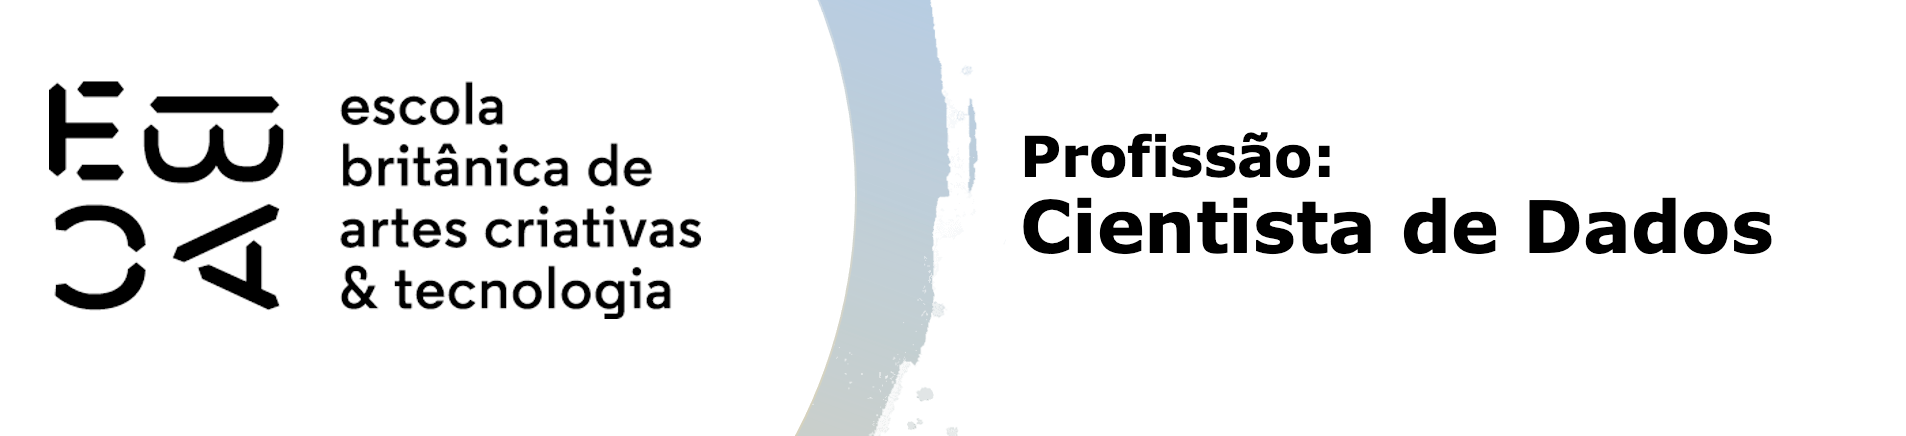

# Rodrigo Schulz

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.Revenue.value_counts(dropna=False)

False    10422
True      1908
Name: Revenue, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [5]:
# Calcular estatísticas descritivas
summary = df.describe()
print(summary)

       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

In [6]:
missing_values = df.isnull().sum()
print(missing_values)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

C:\Users\rodri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rodri\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:150: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\rodri\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 245, in _count_physical_cores
    raise ValueError(
C:\Users\rodri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the 

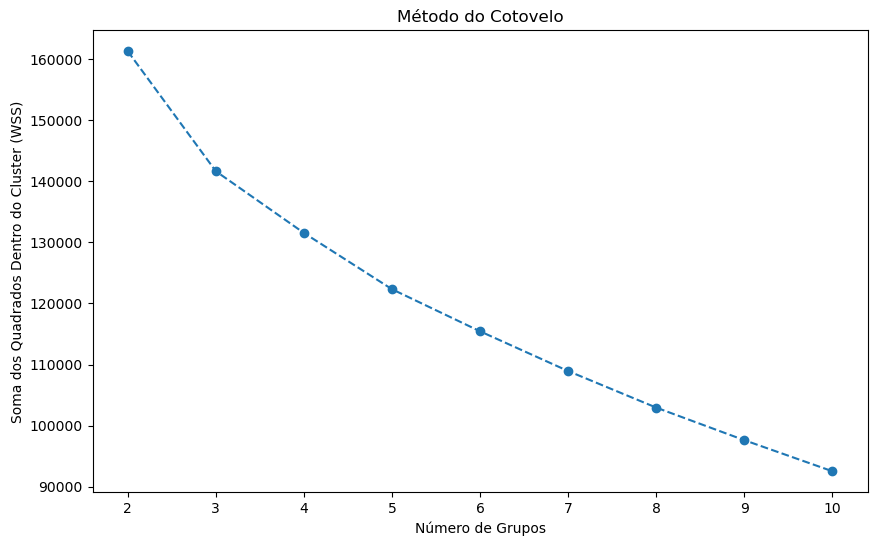

In [10]:
X = df[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend']]

# Padronização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determinar o número adequado de grupos usando o método do cotovelo
wss = []
for i in range(2, 11):  # Testar de 2 a 10 grupos
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wss.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wss, marker='o', linestyle='--')
plt.xlabel('Número de Grupos')
plt.ylabel('Soma dos Quadrados Dentro do Cluster (WSS)')
plt.title('Método do Cotovelo')
plt.xticks(range(2, 11))
plt.show()


## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [13]:
# Definir o número de grupos
num_clusters_3 = 3
num_clusters_5 = 5

# Aplicar K-means para diferentes números de grupos
kmeans_3 = KMeans(n_clusters=num_clusters_3, random_state=42)
kmeans_5 = KMeans(n_clusters=num_clusters_5, random_state=42)

# Adicionar os rótulos dos grupos ao DataFrame original
df['Cluster_3'] = kmeans_3.fit_predict(X_scaled)
df['Cluster_5'] = kmeans_5.fit_predict(X_scaled)

# Análise descritiva para a solução com 3 grupos
desc_3 = df.groupby('Cluster_3')[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']].mean()
print("Análise Descritiva para 3 Grupos:")
print(desc_3)

# Análise descritiva para a solução com 5 grupos
desc_5 = df.groupby('Cluster_5')[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']].mean()
print("\nAnálise Descritiva para 5 Grupos:")
print(desc_5)

C:\Users\rodri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rodri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Análise Descritiva para 3 Grupos:
           Administrative  Administrative_Duration  Informational  \
Cluster_3                                                           
0                7.400376               309.512853       2.550125   
1                0.045627                 1.389417       0.016160   
2                1.723508                51.750598       0.219170   

           Informational_Duration  ProductRelated  ProductRelated_Duration  \
Cluster_3                                                                    
0                      216.119566       97.409148              3857.194359   
1                        0.092395        3.086502                56.978023   
2                        8.264887       24.017455               879.487484   

           BounceRates  ExitRates  PageValues  SpecialDay  
Cluster_3                                                  
0             0.006272   0.019412    9.710385    0.029574  
1             0.166283   0.180287    0.000000    

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [15]:
# Análise das variáveis "BounceRates" e "Revenue" para a solução com 3 grupos
desc_bounce_revenue_3 = df.groupby('Cluster_3')[['BounceRates', 'Revenue']].mean()
print("Análise de BounceRates e Revenue para 3 Grupos:")
print(desc_bounce_revenue_3)

# Análise das variáveis "BounceRates" e "Revenue" para a solução com 5 grupos
desc_bounce_revenue_5 = df.groupby('Cluster_5')[['BounceRates', 'Revenue']].mean()
print("\nAnálise de BounceRates e Revenue para 5 Grupos:")
print(desc_bounce_revenue_5)

# Proporção de clientes que geraram receita em cada grupo
revenue_proportion_3 = df.groupby('Cluster_3')['Revenue'].mean()
revenue_proportion_5 = df.groupby('Cluster_5')['Revenue'].mean()

print("\nProporção de Clientes que Geraram Receita:")
print("Solução com 3 Grupos:")
print(revenue_proportion_3)
print("\nSolução com 5 Grupos:")
print(revenue_proportion_5)

Análise de BounceRates e Revenue para 3 Grupos:
           BounceRates   Revenue
Cluster_3                       
0             0.006272  0.276316
1             0.166283  0.005703
2             0.009159  0.150899

Análise de BounceRates e Revenue para 5 Grupos:
           BounceRates   Revenue
Cluster_5                       
0             0.021609  0.060574
1             0.008548  0.178571
2             0.009070  0.152070
3             0.006328  0.301976
4             0.181485  0.005574

Proporção de Clientes que Geraram Receita:
Solução com 3 Grupos:
Cluster_3
0    0.276316
1    0.005703
2    0.150899
Name: Revenue, dtype: float64

Solução com 5 Grupos:
Cluster_5
0    0.060574
1    0.178571
2    0.152070
3    0.301976
4    0.005574
Name: Revenue, dtype: float64
